In [47]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

In [3]:
# read reservoir location dataset
res_location_fn = "../data/Reservoir-Locations.csv"
res_location = pd.read_csv(res_location_fn)

res_location.head()

,X,Y,YEAR,COUNTRY,RAT_ID,NAME,FNAME
0,100.450760,24.624938,1995.0,China,4,Manwan,5117
1,102.567564,18.539895,1972.0,Laos,5,Nam Ngum,Nam_Ngum_1
2,102.942516,18.442170,2000.0,Laos,6,Nam Leuk,5148
3,103.702018,17.259740,1973.0,Thailand,7,Nam Oun,5143
4,104.187228,17.194252,-99.0,Thailand,8,Nong Han Lake,5147


In [5]:
# select one reservoir of choice to make initial plots
resname = "Sirindhorn"
resinfo = res_location[res_location['NAME'] == resname]
resinfo

,X,Y,YEAR,COUNTRY,RAT_ID,NAME,FNAME
15,105.385426,15.157156,1971.0,Thailand,19,Sirindhorn,Sirindhorn


In [24]:
# Load TMS-OS dataset
tmsos_fn = f"../data/surface-areas/tmsos/{resinfo['FNAME'].values[0]}.csv"
tmsos_df = pd.read_csv(tmsos_fn, parse_dates=['date']).set_index('date')
tmsos_df.head()

,water_area_uncorrected,non_water_area,cloud_area,unfiltered_area,cloud_percent,QUALITY_DESCRIPTION,sat,filtered_area,corrected_areas_1,corrected_trend_1,sar_trend,days_passed,area
date,,,,,,,,,,,,,
2019-01-06,192.613025,192.121537,1.553197,192.959379,0.402083,0.0,s2,192.959379,190.823821,15.870460,-0.078240,5.0,190.823821
2019-01-11,85.731043,226.120137,74.711894,NaN,19.327220,0.0,s2,NaN,NaN,NaN,-0.097799,5.0,190.334824
2019-01-16,190.780815,194.305451,1.448011,190.823821,0.374614,0.0,s2,190.823821,190.823821,-0.213556,-0.021771,5.0,190.823821
2019-01-21,189.321212,195.622705,1.570400,189.476029,0.406298,0.0,s2,189.476029,189.476029,-0.269558,0.092273,5.0,189.476029
2019-01-26,171.927325,213.144993,1.480774,NaN,0.383071,0.0,s2,NaN,NaN,NaN,0.092273,5.0,189.937394


In [53]:
raw_areas = tmsos_df['water_area_uncorrected'].dropna()
raw_areas = raw_areas[tmsos_df['cloud_percent'] < 90]

Version 1: Two subplots showing the raw vs. tmsos derived surface area

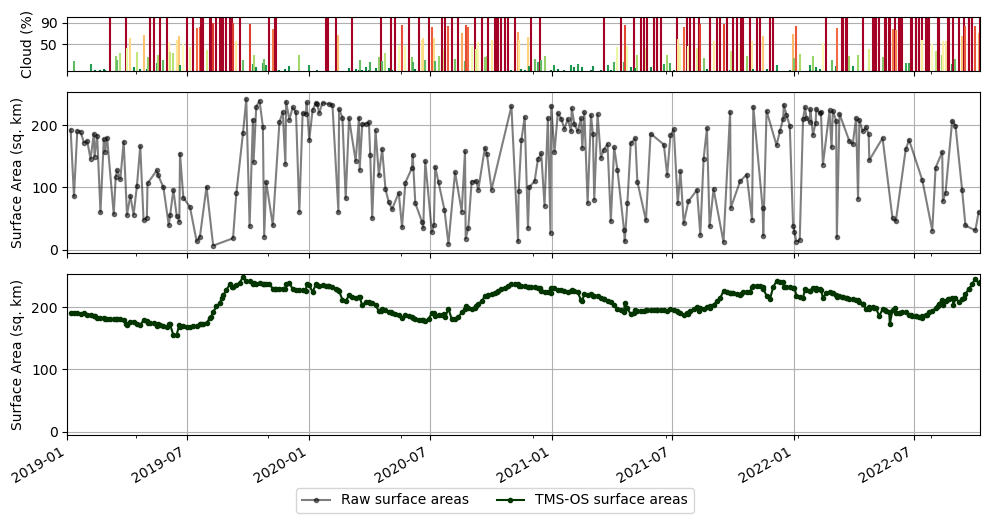

In [81]:
f, (ax0, ax1, ax2) = plt.subplots(
    figsize=(10, 5), 
    nrows = 3, 
    sharex=True, 
    gridspec_kw=dict(height_ratios=[1, 3, 3])
)

clouds_percent = tmsos_df['cloud_percent']
# colors for vertical lines
norm = mpl.colors.Normalize(vmin=0, vmax=100)
cmap = mpl.cm.get_cmap('RdYlGn_r')
colors = [cmap(norm(v)) for v in clouds_percent]

ax0.vlines(clouds_percent.index, 0, clouds_percent.values, colors=colors)
ax0.grid(axis='y')
ax0.set_ylabel('Cloud (%)')

ax0.set_xlim(pd.to_datetime('2019-01-01'), tmsos_df.index.max())
ax0.set_ylim(0, 100)
ax0.set_yticks([50, 90])

raw_areas.plot(color='xkcd:black', label='Raw surface areas', alpha=0.5, linestyle='-', marker='.', ax=ax1)

# raw_areas.plot(color='xkcd:black', label='', alpha=0.3, linestyle='dotted', marker='.', ax=ax2)
final_hdl = tmsos_df['area'].plot(color='xkcd:dark green', label='TMS-OS surface areas', marker='.', ax=ax2)

for ax in (ax1, ax2):
    ax.grid()
    ax.set_ylabel("Surface Area (sq. km)")

ax2.set_xlabel('')
ax2.set_ylim(ax1.get_ylim())

# f.suptitle(f"Tiered multi-sensor high frequency surface area - {resname_pretty}")
f.legend(ncol=3, bbox_to_anchor=[0.5, 0.04], loc='upper center')
plt.tight_layout()
# f.set_size_inches(10, 12)

Version 2: One subplot showing the raw vs. tmsos derived surface area

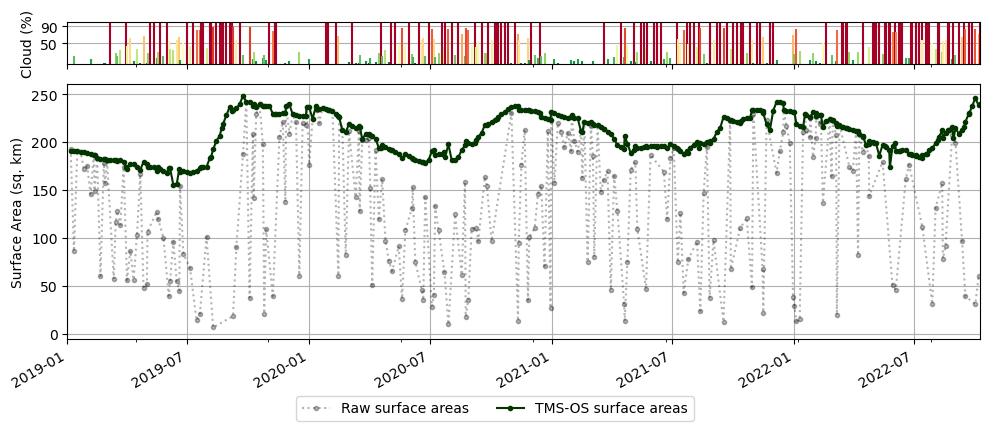

In [82]:
f, (ax0, ax1) = plt.subplots(
    figsize=(10, 4), 
    nrows = 2, 
    sharex=True, 
    gridspec_kw=dict(height_ratios=[1, 6])
)

clouds_percent = tmsos_df['cloud_percent']
# colors for vertical lines
norm = mpl.colors.Normalize(vmin=0, vmax=100)
cmap = mpl.cm.get_cmap('RdYlGn_r')
colors = [cmap(norm(v)) for v in clouds_percent]

ax0.vlines(clouds_percent.index, 0, clouds_percent.values, colors=colors)
ax0.grid(axis='y')
ax0.set_ylabel('Cloud (%)')

ax0.set_xlim(pd.to_datetime('2019-01-01'), tmsos_df.index.max())
ax0.set_ylim(0, 100)
ax0.set_yticks([50, 90])


raw_areas.plot(color='xkcd:black', label='Raw surface areas', alpha=0.3, linestyle='dotted', marker='.', ax=ax1)
final_hdl = tmsos_df['area'].plot(color='xkcd:dark green', label='TMS-OS surface areas', marker='.', ax=ax1)

ax1.grid()
ax1.set_ylabel("Surface Area (sq. km)")

ax1.set_xlabel('')

# f.suptitle(f"Tiered multi-sensor high frequency surface area - {resname_pretty}")
f.legend(ncol=3, bbox_to_anchor=[0.5, 0.04], loc='upper center')
plt.tight_layout()
# f.set_size_inches(10, 12)